# Capstone Project: Consumer Insights Data Analytics Externship of Beats by Dre

## 1. Title Page
**Project Title:** Consumer Insights Data Analytics Externship of Beats by Dre  
**Name:** Taksh Girdhar  
**Date:** 29th July 2024

## 2. Table of Contents
1. Introduction
2. Data Description
3. Exploratory Data Analysis (EDA)
4. Sentiment Analysis
5. AI-Generated Insights
6. Comparative Analysis
7. Strategic Recommendations
8. Conclusion
9. References

## 3. Introduction

### 3.1 Project Overview

---

The tech industry is fundamentally driven by consumer preferences and perceptions. For brands to thrive they must grasp a deep understanding of consumer sentiment of their products or services. This study focuses on Beats by Dre, a household name in the audio market, and aims to decode the consumer opinion surrounding its products.

By throughly analyzing a vast dataset comprising of online reviews from Amazon.com, I will investigate and determine the consumer sentiment towards Beats by Dre. Through a rigorous data cleaning and preprocessing phase, we ensure the reliability and accuracy of our analysis.

The methodology encompasses both quantitative and qualitative approaches.
Quantitative analysis involves statistical techniques which I will use to identify trends and patterns in consumer sentiment, while qualitative analysis will be utilized for a deeper exploration of consumer feedback and opinions. By combining these methods, I aim to provide a comprehensive and clear understanding of consumer perceptions of Beats by Dre.

The findings of this study will offer valuable insights into consumer preferences, pain points, and expectations. These insights can be used to make data driven decisions by Beats by Dre such as streamlining and/or refining products, enhance marketing strategies, and strengthen its overall brand image.


### 3.2 Background
Beats by Dre is an audio brand that has successfully created a strong brand identity that is associated with high-quality headphones and a youthful, aspirational lifestyle.

In today's constantly evolving tech industry, understanding consumer sentiment is no longer an option, it's a necessity. It serves as a fundamental pillar for informed decision-making, enabling businesses to stay ahead of the curve. By thoroughly analyzing consumer opinions, preferences, and behaviors, companies can gain invaluable insights into market trends, customer needs, and brand perception.

For Beats by Dre, consumer sentiment analysis is crucial in maintaining its market leadership. By delving deep into customer feedback, the brand can identify areas of strength, find exact potential weaknesses, and uncover untapped opportunities. This data-driven approach empowers Beats to refine its product offerings, optimize marketing campaigns, and ultimately enhance customer satisfaction.





## 4. Data Description

### 4.1 Data Sources
Data for this study was primarily sourced from Amazon product reviews for Beats by Dre headphones. This platform was chosen due to its vast user base, detailed review sections, and the ability to filter reviews based on specific product models. Amazon's review system provides a rich dataset that reflects a diverse range of consumer opinions and experiences with Beats by Dre products. While other platforms could offer additional insights, Amazon's comprehensive data served as the primary source for this analysis.










### 4.2 Data Collection
To efficiently and systematically gather Amazon product reviews for Beats by Dre headphones, I used the ***Oxylabs API***. This powerful tool enabled us to extract relevant data, including review text, ratings, and timestamps, directly from Amazon's platform. By automating the data collection process through the Oxylabs API, we were able to acquire a substantial dataset in a relatively short timeframe. This approach ensured consistency and accuracy in data acquisition, facilitating subsequent analysis and insights.


####Challenges Faced
- Inaccurate HTML Parsing: The Oxylabs API's HTML parsing capabilities proved to be inconsistent, resulting in incomplete or incorrect data extraction for some product pages. Overcoming this required manual adjustments to the configurations of the API and cross-verification of extracted data.

- Page Limit Restrictions: The API imposed a page limit requiring a multi-step process. To gather a sufficient dataset, it was essential to individually collect reviews for different Beats by Dre products and subsequently merge the extracted data into a unified dataset.

- Data Variability: The format and content of Amazon reviews can vary significantly across different product categories and over time, necessitating careful data cleaning and standardization.







### 4.3 Data Cleaning


Let's first load all the necessary libraries

In [ ]:
#Data Handling
import pandas as pd
import numpy as np
import re

Let's also load the collected dataset for which the process was highlighted in the previous section

In [ ]:
all_reviews = pd.read_csv("/content/all_reviews.csv")
all_reviews_df = pd.DataFrame(all_reviews)


####Identifying Missing Values

Let's find the total number of missing values in the dataset

In [ ]:
missing_values = all_reviews_df.isnull().sum()
print(missing_values)

review_id             0
product_id            0
title                 0
author                0
rating                0
content               2
timestamp             0
profile_id            0
is_verified           0
helpful_count         0
product_attributes    1
dtype: int64


####Handling Missing Values

- In this analysis, we will drop the missing values from the dataset because the columns with missing data are not relevant to our objectives.
- These columns include non-essential information such as content or incomplete data that do not contribute or create a bias in the understanding the overall sentiment of the reviews.
- By removing these irrelevant missing values, we streamline the dataset, ensuring that our analysis focuses only on the key aspects of the reviews that are critical for extracting meaningful insights.
- This approach helps maintain the integrity and quality of the data, leading to more accurate and reliable analysis results.








In [ ]:
all_reviews_df = all_reviews_df.dropna()
all_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review_id           997 non-null    object
 1   product_id          997 non-null    object
 2   title               997 non-null    object
 3   author              997 non-null    object
 4   rating              997 non-null    object
 5   content             997 non-null    object
 6   timestamp           997 non-null    object
 7   profile_id          997 non-null    object
 8   is_verified         997 non-null    bool  
 9   helpful_count       997 non-null    int64 
 10  product_attributes  997 non-null    object
dtypes: bool(1), int64(1), object(9)
memory usage: 86.7+ KB


**Observations:**
- As the non-null count shows, 3 rows have been removed

##### Finding outliers in dataset (i.e duplicates)

In [ ]:
duplicate_reviews = all_reviews_df.duplicated().sum()
print("Duplicate rows:", duplicate_reviews)

Duplicate rows: 0


**Observations:**
- As the count of any duplicate reviews shows, there are no duplicate values

####Correcting inconsistencies
##### Converting categorial data to numerical data
- Currently the title column contains the product's rating and the title while the rating column contains the author's name so that needs to be fixed by moving the product's rating from the title column to the rating column.

- IMPORTANT: Run the following code once or the rating column will empty. If this happens, delete the all_reviews_csv file from colab files section and  then reupload it and run all the cells from the beginning

Create new columns for the corrected data


In [ ]:
new_titles = []
new_ratings = []
new_authors = []

Extracting and removing rating from title

Move rating and title to new columns

In [ ]:
for index, row in all_reviews_df.iterrows():
    # Extract rating from the title
    title = row['title']
    matched_data = re.search(r"(\d+\.\d+) out of 5 stars", title)
    if matched_data:
        rating = float(matched_data.group(1))
        # Remove the rating part from the title
        new_title = re.sub(r"\d+\.\d+ out of 5 stars ", "", title)
    else:
        rating = None
        new_title = title

    # Add the cleaned data to the new columns
    new_titles.append(new_title)
    new_ratings.append(rating)
    # Move the author name from 'rating' column
    new_authors.append(row['rating'])

Updating the data frame with new columns

In [ ]:
# Update the DataFrame with the new columns
all_reviews_df['title'] = new_titles
all_reviews_df['rating'] = new_ratings
all_reviews_df['author'] = new_authors

Converting rating column to numeric values

In [ ]:
all_reviews_df['rating'] = pd.to_numeric(all_reviews_df['rating'], errors='coerce')

In [ ]:
print(all_reviews_df.info())
all_reviews_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review_id           997 non-null    object 
 1   product_id          997 non-null    object 
 2   title               997 non-null    object 
 3   author              997 non-null    object 
 4   rating              997 non-null    float64
 5   content             997 non-null    object 
 6   timestamp           997 non-null    object 
 7   profile_id          997 non-null    object 
 8   is_verified         997 non-null    bool   
 9   helpful_count       997 non-null    int64  
 10  product_attributes  997 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(8)
memory usage: 86.7+ KB
None


,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,RAI90QWJQJF03,B0CCBKGDJD,Literally mind-blowing upgrading from AirPods ...,Christian Waymire,5.0,Beats**all coming from an airpods & airpods pr...,"Reviewed in the United States October 17, 2023",AH6FFZWTYTQH3JFZKOI4VDFSDWRA,True,439,Color: BlackStyle: Solo3Set: Without AppleCare+
1,R1MJ08QRWZKAK6,B0CCBKGDJD,My Go-to Headset,Amiyah Ogo,5.0,After going through so many headsets during co...,"Reviewed in the United States May 18, 2024",AFIJUR2VSHB22IMJLMDTASXNVQOQ,True,2,Color: BlackStyle: Solo3Set: Without AppleCare+
2,R2IQV1A1SCQDVZ,B0CCBKGDJD,These headphones deserve the hype!,Mariah Chapman,5.0,At last I finally found the perfect wireless h...,"Reviewed in the United States January 19, 2024",AHKIWC4UYPVHMRXYTTGAEA655Q2Q,True,139,Color: SilverStyle: Solo3Set: Without AppleCare+
3,RB86XLAVC3GP7,B0CCBKGDJD,"10/10, would buy again",Nala,5.0,"They fit really nice, only problem is they hur...","Reviewed in the United States May 14, 2024",AEA3T5GCVIVOIBO3Z2IHXI7F64HA,True,5,Color: BlackStyle: Solo3Set: Without AppleCare+
4,R2Z4K7Q4FQDJMI,B0CCBKGDJD,Worth it,kwine,5.0,"Coming from AirPod Pros, these are wonderful. ...","Reviewed in the United States June 9, 2024",AHEIOV53ZFYIE7NQ5B2U236WK3GQ,True,1,Color: BlackStyle: Solo3Set: Without AppleCare+


##### Checking the rating values
- Check that all the rating values are between 0 and 5

In [ ]:
invalid_ratings = all_reviews_df[(all_reviews_df['rating'] < 0) | (all_reviews_df['rating'] > 5) | (all_reviews_df['rating'].isna())]
print("Invalid Ratings: ", invalid_ratings['rating'].count())

Invalid Ratings:  0


####Final Cleaned Dataset


In [ ]:
arc_df = all_reviews_cleaned_df = all_reviews_df
arc_df.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,RAI90QWJQJF03,B0CCBKGDJD,Literally mind-blowing upgrading from AirPods ...,Christian Waymire,5.0,Beats**all coming from an airpods & airpods pr...,"Reviewed in the United States October 17, 2023",AH6FFZWTYTQH3JFZKOI4VDFSDWRA,True,439,Color: BlackStyle: Solo3Set: Without AppleCare+
1,R1MJ08QRWZKAK6,B0CCBKGDJD,My Go-to Headset,Amiyah Ogo,5.0,After going through so many headsets during co...,"Reviewed in the United States May 18, 2024",AFIJUR2VSHB22IMJLMDTASXNVQOQ,True,2,Color: BlackStyle: Solo3Set: Without AppleCare+
2,R2IQV1A1SCQDVZ,B0CCBKGDJD,These headphones deserve the hype!,Mariah Chapman,5.0,At last I finally found the perfect wireless h...,"Reviewed in the United States January 19, 2024",AHKIWC4UYPVHMRXYTTGAEA655Q2Q,True,139,Color: SilverStyle: Solo3Set: Without AppleCare+
3,RB86XLAVC3GP7,B0CCBKGDJD,"10/10, would buy again",Nala,5.0,"They fit really nice, only problem is they hur...","Reviewed in the United States May 14, 2024",AEA3T5GCVIVOIBO3Z2IHXI7F64HA,True,5,Color: BlackStyle: Solo3Set: Without AppleCare+
4,R2Z4K7Q4FQDJMI,B0CCBKGDJD,Worth it,kwine,5.0,"Coming from AirPod Pros, these are wonderful. ...","Reviewed in the United States June 9, 2024",AHEIOV53ZFYIE7NQ5B2U236WK3GQ,True,1,Color: BlackStyle: Solo3Set: Without AppleCare+


#

## 5. Exploratory Data Analysis (EDA)

### 5.1 Data Overview



Lets load all the libraries necessary for EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
print("Measures of Central Tendancy")
print("Mean: ", arc_df['rating'].mean())
print("Median: ", arc_df['rating'].median())
print("Mode: ", arc_df['rating'].mode()[0])
print("\nMeasures of Data Dispersion")
print("Variance ", arc_df['rating'].var())
print("Standard Deviation ", arc_df['rating'].std())
print("\nMeasures of Data Distribution")
quantiles = arc_df['rating'].quantile([0.25,0.5,0.75])
print("Quantiles \n", quantiles)

Measures of Central Tendancy
Mean:  4.601805416248746
Median:  5.0
Mode:  5.0

Measures of Data Dispersion
Variance  0.3563421187256549
Standard Deviation  0.5969439829043047

Measures of Data Distribution
Quantiles 
 0.25    4.0
0.50    5.0
0.75    5.0
Name: rating, dtype: float64


### 5.2 Visualizations
Include relevant visualizations (histograms, box plots, scatter plots, etc.) and explain what each visualization reveals about the data.

#### Distribution of target variable (`rating`)

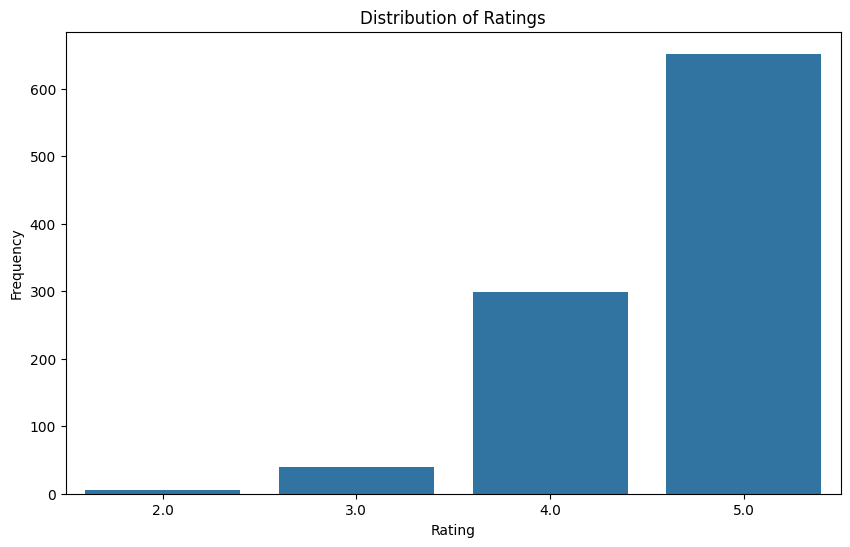

In [ ]:
plt.figure(figsize=(10, 6))
distplt = sns.countplot(x = 'rating', data= arc_df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

**Observations**
1. High Frequency of 5-Star Ratings:
  - The majority of the ratings are 5 stars, with over 600 reviews falling into this category. This indicates a high level of customer satisfaction with the products.

2. Significant Number of 4-Star Ratings:
  - The second most common rating is 4 stars, with approximately 300 reviews. This suggests that while some customers have minor reservations, they are still generally satisfied with the products.

3. Low Frequency of 3-Star Ratings:
  - There is a noticeable drop in the number of 3-star ratings, indicating fewer customers felt the products were average.

4. Minimal Low Ratings (1 and 2 Stars):
  - There are very few 1-star and 2-star ratings. This further highlights the overall positive sentiment towards the products, with very few customers expressing strong dissatisfaction.
Skewed Distribution:

---

The distribution is heavily skewed towards higher ratings (4 and 5 stars), which aligns with the earlier statistical measures indicating high mean, median, and mode.

####Average Rating for Each Product Bar Plot:




Lets create a function to convert product IDs to name of the respective company for easier labeling

In [ ]:
def replace_id_with_name(product_id):
  product_to_company = {
      'B0CCBKGDJD': 'Beats by Dr.Dre',
      'B08WM3LMJF':'JBL',
      'B0BS1QB15L': 'Sony',
      'B07NM3RSRQ':'Soundcore Anker',
      'B0B75MQJQR':'Skullcandy',
      'B09LYF2ST7':'Beribes',
      'B08KHT2HDT':'Marshall',
      'B09BF64J55':'KIVIDIO',
      'B08PY9LYQ8': 'DOQAUS',
      'B0B6GHW1SX':'Sennheiser',
  }
  return product_to_company[product_id]

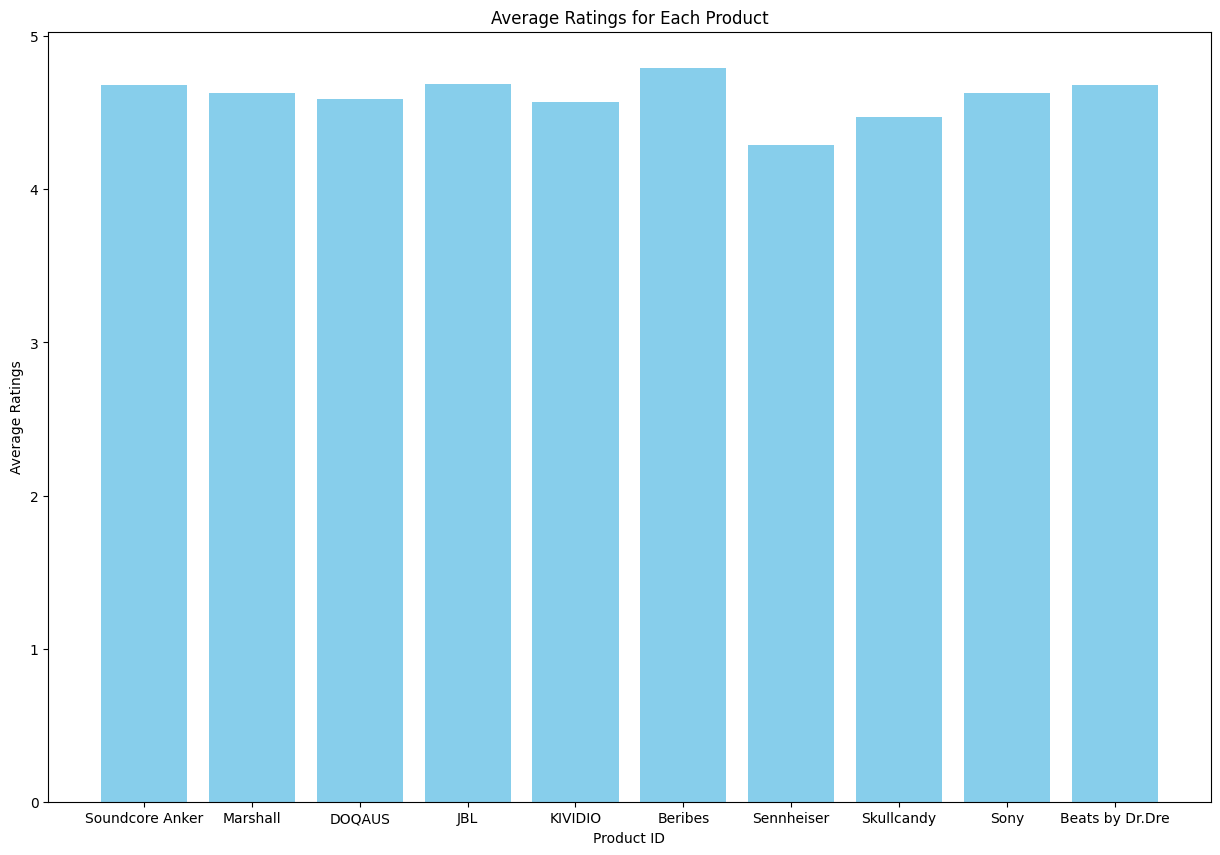

In [ ]:
unique_product_ids = arc_df['product_id'].unique()
average_ratings = arc_df.groupby('product_id')['rating'].mean().reset_index()

average_ratings['company'] = average_ratings['product_id'].apply(replace_id_with_name)


plt.figure(figsize = (15,10))
plt.bar(average_ratings['company'], average_ratings['rating'], color = 'skyblue')
plt.xlabel('Product ID')
plt.ylabel('Average Ratings')
plt.title('Average Ratings for Each Product')
plt.show()

**Observations**
1. High Average Ratings Across Products:
  - All products have high average ratings, indicating overall positive customer satisfaction.

2. Top Rated Products:
  - Products from doqaus and Sony have the highest average ratings, nearly reaching the 5-star mark. This suggests that customers are particularly satisfied with these brands.

3. Consistent High Ratings:

  - Brands like Soundcore Anker, Marshall, DOQAUS, JBL, Beribes, Sennheiser, and Beats by Dr. Dre also have high average ratings, all close to or above 4.5 stars. This indicates a consistent level of customer satisfaction across these brands.

4. Relatively Lower Ratings:

  - Skullcandy has slightly lower average ratings compared to other brands, though still high. This may indicate room for improvement in customer satisfaction for Skullcandy products.

5. Narrow Rating Range:

  - The range of average ratings is narrow, primarily between 4.3 and 4.9 stars, showing that all products are well-received with minimal significant differences in customer ratings.

6. Implications for Competition:
  - The high and close average ratings across different brands indicate a competitive market where most brands are performing well in terms of customer satisfaction. It suggests that customers are generally pleased with the audio products they are purchasing, regardless of the brand.

---
Overall, the plot highlights the strong positive reception of audio products from various brands, with very little deviation in the average ratings, reflecting a high standard of quality and customer satisfaction across the board.

#### Rating vs. Review content length

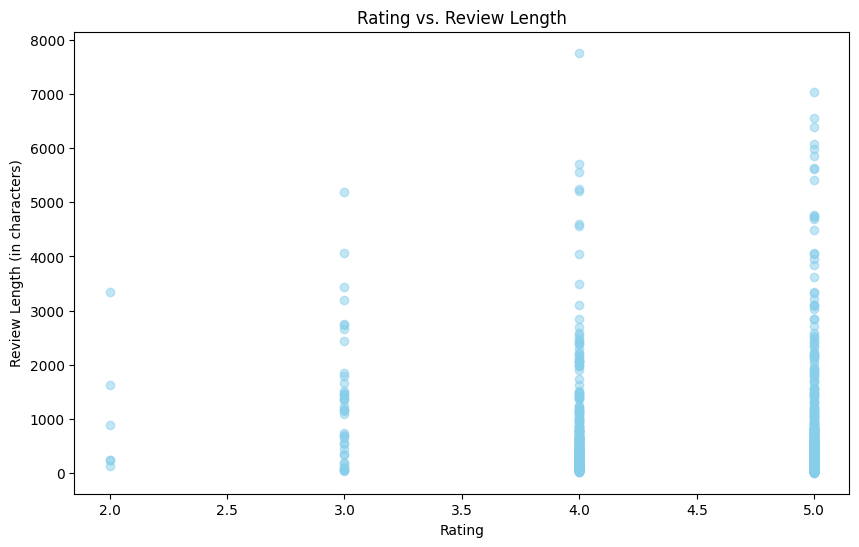

In [ ]:
len_df = pd.DataFrame(arc_df['content'].apply(len))
len_df['review_length'] = len_df['content']

plt.figure(figsize=(10, 6))
plt.scatter(arc_df['rating'], len_df['review_length'], alpha=0.5, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Review Length (in characters)')
plt.title('Rating vs. Review Length')
plt.show()

**Observations**
1. Positive Correlation Between Review Length and Higher Ratings:

  - Reviews with higher ratings (4 and 5) tend to have longer review lengths, suggesting that customers who are more satisfied with a product are likely to write more detailed reviews.

2. Variety in Review Length Across Ratings:

  - There is a wide variety of review lengths for each rating level. However, higher ratings (4 and 5) show a broader spread in review lengths, from very short to very long reviews.

  - Lower ratings (2 and 3) also exhibit varied lengths but tend to have fewer long reviews compared to higher ratings.

3. Outliers:

  - There are some notable outliers, particularly in the higher rating categories, where review lengths can go up to 8000 characters. This indicates that some users are extremely detailed in their positive reviews.

4. Short Reviews for Low Ratings:

  - Reviews with lower ratings (2) tend to be shorter. This could indicate that dissatisfied customers might provide brief feedback.

5. Clustered Review Lengths:

  - Most of the reviews, regardless of rating, cluster around shorter lengths (under 1000 characters). This suggests that while detailed reviews exist, the majority of users prefer to write brief reviews.

6. Insights for Product Improvement:

  - The length and detail of positive reviews can provide valuable insights for product improvement and marketing strategies, highlighting features that customers appreciate most.
  - Short and negative reviews might pinpoint specific areas where the product or service needs enhancement.

### 5.3 Descriptive Statistics
Discuss key findings from the descriptive statistics, highlighting any patterns, trends, or anomalies.

**Observations**

- Measures of Central Tendency
  - Mean Rating (4.60): The average rating is 4.60, indicating that overall, customers tend to rate the products positively.
  - Median Rating (5.0): The median rating is 5.0, which means that more than half of the ratings are at the maximum value. This suggests a high level of customer satisfaction.
  - Mode Rating (5.0): The most frequently occurring rating is 5.0, reinforcing that many customers are extremely satisfied with the products.

---
- Measures of Data Dispersion
  - Variance (0.356): The variance is relatively low, indicating that the ratings do not vary widely from the mean. Most of the ratings are clustered around the mean.
  - Standard Deviation (0.597): The standard deviation is also low, further confirming that the ratings are closely packed around the mean rating of 4.60.

---
- Measures of Data Distribution
  - First Quartile (Q1 = 4.0): 25% of the ratings are 4.0 or lower. This means that the lower bound of the middle 50% of the data is still a positive rating.
  - Second Quartile (Q2 = Median = 5.0): 50% of the ratings are 5.0 or lower, as previously mentioned.
  - Third Quartile (Q3 = 5.0): Shows that 75% of the ratings are at least 5.0.

## 6. Sentiment Analysis

### 6.1 Methodology
Lets load all the libraries for the sentiment analysis

In [ ]:
import nltk
from textblob import TextBlob

####Sentiment Analysis for Each Product


Lets create function to compute the sentiment and subjectivity so that it can be used for each product



In [ ]:
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

def get_subjectivity(text):
    blob = TextBlob(text)
    return blob.sentiment.subjectivity

##### Beats By Dr.Dre Product

In [ ]:
product_reviews_beats = arc_df[arc_df['product_id'] == 'B0CCBKGDJD'].copy()

product_reviews_beats['sentiment'] = product_reviews_beats['content'].apply(get_sentiment)
product_reviews_beats['subjectivity'] = product_reviews_beats['content'].apply(get_subjectivity)

beats_sentiment_df = product_reviews_beats[['rating', 'content', 'sentiment', 'subjectivity']]

beats_sentiment_df.reset_index(drop=True, inplace=True)

beats_sentiment_df

,rating,content,sentiment,subjectivity
0,5.0,Beats**all coming from an airpods & airpods pr...,0.186461,0.523703
1,5.0,After going through so many headsets during co...,0.405983,0.577350
2,5.0,At last I finally found the perfect wireless h...,0.188367,0.562828
3,5.0,"They fit really nice, only problem is they hur...",0.443750,0.668750
4,5.0,"Coming from AirPod Pros, these are wonderful. ...",0.296970,0.628788
...,...,...,...,...
93,5.0,Sounds great but thought I ordered pro but tha...,0.400000,0.625000
94,4.0,The battery life is very good. I don't have to...,0.505000,0.540000
95,5.0,This was a great gift and great quality for he...,0.687500,0.750000
96,5.0,Great gift. Purchased for my teenager and they...,0.800000,0.750000


Lets convert the dataframe to a csv file

In [ ]:
beats_sentiment_df.to_csv('beats_sentiment.csv', index=False)

Let's now assess the sentiment scores by looking at a summary of the statstics and aggregating the sentiment scores for the Beats Product

In [ ]:
print(beats_sentiment_df['sentiment'].describe())
print('\nOverall Sentiment: ', beats_sentiment_df['sentiment'].mean())

count    98.000000
mean      0.339030
std       0.243373
min      -0.500000
25%       0.186937
50%       0.320333
75%       0.485391
max       1.000000
Name: sentiment, dtype: float64

Overall Sentiment:  0.3390301151112527


#####JBL Product

In [ ]:
product_reviews_jbl = arc_df[arc_df['product_id'] == 'B08WM3LMJF'].copy()

product_reviews_jbl['sentiment'] = product_reviews_jbl['content'].apply(get_sentiment)
product_reviews_jbl['subjectivity'] = product_reviews_jbl['content'].apply(get_subjectivity)

jbl_sentiment_df = product_reviews_jbl[['rating', 'content', 'sentiment', 'subjectivity']]

jbl_sentiment_df.reset_index(drop=True, inplace=True)

jbl_sentiment_df

,rating,content,sentiment,subjectivity
0,5.0,I needed new headphones and so did my boys. We...,0.188538,0.504183
1,5.0,I got two pair of these. One was a thank you p...,0.257143,0.571429
2,5.0,I was very pleased with this set of headphones...,0.471212,0.671212
3,4.0,The JBL Tune 510BT Wireless On-Ear Headphones ...,0.186426,0.548944
4,5.0,All features are intuitive. Sound is good for ...,0.240741,0.474074
...,...,...,...,...
95,5.0,I've had these headphones for awhile now. I lo...,0.402803,0.580909
96,4.0,I got these headphones on sale for $40 and for...,0.268229,0.504167
97,5.0,My daughter wears these things non stop. They ...,0.758333,0.833333
98,4.0,Beware the headphones fit tight and hurts for ...,0.246429,0.448214


Let's convert the dataframe to a csv file

In [ ]:
jbl_sentiment_df.to_csv('jbl_sentiment.csv', index=False)

Let's now assess the sentiment scores by looking at a summary of the statstics and aggregating the sentiment scores for the JBL Product

In [ ]:
print(jbl_sentiment_df['sentiment'].describe())
print('\nOverall Sentiment: ', jbl_sentiment_df['sentiment'].mean())

count    100.000000
mean       0.265662
std        0.185533
min       -0.300000
25%        0.164807
50%        0.257999
75%        0.399312
max        0.758333
Name: sentiment, dtype: float64

Overall Sentiment:  0.2656617616019926


#####Sony Product

In [ ]:
product_reviews_sony = arc_df[arc_df['product_id'] == 'B0BS1QB15L'].copy()

product_reviews_sony['sentiment'] = product_reviews_sony['content'].apply(get_sentiment)
product_reviews_sony['subjectivity'] = product_reviews_sony['content'].apply(get_subjectivity)

sony_sentiment_df = product_reviews_sony[['rating', 'content', 'sentiment', 'subjectivity']]

sony_sentiment_df.reset_index(drop=True, inplace=True)

sony_sentiment_df

,rating,content,sentiment,subjectivity
0,5.0,I wasn’t sure what to expect with the price po...,0.393750,0.651389
1,5.0,I have gone through a few pairs of beats and s...,0.165381,0.494595
2,4.0,"UPDATE (Dec 10, 2023): This is going to be my ...",0.178163,0.517938
3,5.0,My rawest review on this is that 1)The battery...,0.134444,0.505185
4,5.0,These headphones came in very nicely protected...,0.426667,0.716389
...,...,...,...,...
95,5.0,Birthday gift for my brother. First pair I ord...,0.125000,0.666667
96,5.0,It's easy to use. The quality is great and the...,0.288889,0.622222
97,5.0,Sounds like surround sound! Battery life is ou...,0.251042,0.495833
98,5.0,Work great!,1.000000,0.750000


Let's convert the dataframe to a csv file

In [ ]:
sony_sentiment_df.to_csv('sony_sentiment.csv', index=False)

Let's now assess the sentiment scores by looking at a summary of the statstics and aggregating the sentiment scores for the Sony Product

In [ ]:
print(sony_sentiment_df['sentiment'].describe())
print('\nOverall Sentiment: ', sony_sentiment_df['sentiment'].mean())

count    100.000000
mean       0.254867
std        0.204148
min       -0.200000
25%        0.133571
50%        0.256287
75%        0.394479
max        1.000000
Name: sentiment, dtype: float64

Overall Sentiment:  0.25486688047489225


#####Soundcore Anker Product

In [ ]:
product_reviews_anker = arc_df[arc_df['product_id'] == 'B07NM3RSRQ'].copy()

product_reviews_anker['sentiment'] = product_reviews_anker['content'].apply(get_sentiment)
product_reviews_anker['subjectivity'] = product_reviews_anker['content'].apply(get_subjectivity)

anker_sentiment_df = product_reviews_anker[['rating', 'content', 'sentiment', 'subjectivity']]

anker_sentiment_df.reset_index(drop=True, inplace=True)

anker_sentiment_df

,rating,content,sentiment,subjectivity
0,5.0,Update Dec 2023- These headphones are still as...,0.353478,0.566127
1,5.0,I have never owned a high-end Bose or Sony noi...,0.187681,0.543116
2,4.0,I bought these because I wanted a cheap (inexp...,0.167578,0.631076
3,5.0,This is a fantastic product. I bought it becau...,0.364503,0.609480
4,5.0,I've been using the Soundcore Q20 headphones f...,0.370000,0.584755
...,...,...,...,...
95,5.0,We purchased these (2 sets) primarily to use o...,0.390000,0.416667
96,4.0,"Good customer service wins the day, they gave ...",0.314198,0.462071
97,4.0,Just got it today. My other headphones of a di...,0.132526,0.493537
98,4.0,If you are buying them for the noise canceling...,0.272917,0.500000


Let's convert the dataframe to a csv file

In [ ]:
anker_sentiment_df.to_csv('anker_sentiment.csv', index=False)

Let's now assess the sentiment scores by looking at a summary of the statstics and aggregating the sentiment scores for the Anker Product

In [ ]:
print(anker_sentiment_df['sentiment'].describe())
print('\nOverall Sentiment: ', anker_sentiment_df['sentiment'].mean())

count    100.000000
mean       0.242333
std        0.108061
min       -0.127273
25%        0.188068
50%        0.235414
75%        0.290959
max        0.633333
Name: sentiment, dtype: float64

Overall Sentiment:  0.2423333176402117


##### Skullcandy Product

In [ ]:
product_reviews_skullcandy = arc_df[arc_df['product_id'] == 'B0B75MQJQR'].copy()

product_reviews_skullcandy['sentiment'] = product_reviews_skullcandy['content'].apply(get_sentiment)
product_reviews_skullcandy['subjectivity'] = product_reviews_skullcandy['content'].apply(get_subjectivity)

skullcandy_sentiment_df = product_reviews_skullcandy[['rating', 'content', 'sentiment', 'subjectivity']]

skullcandy_sentiment_df.reset_index(drop=True, inplace=True)

skullcandy_sentiment_df

,rating,content,sentiment,subjectivity
0,5.0,For the price these are excellent headphones a...,0.198248,0.539712
1,5.0,"bass is nice and smooth, get plenty loud for m...",0.350000,0.710000
2,4.0,"I buy the wired ones for the price, comfort an...",0.168182,0.437121
3,5.0,"I absolutely LOVED these headphones. I say ""lo...",0.185606,0.539015
4,5.0,people love to complain about skull candy when...,0.339103,0.487179
...,...,...,...,...
95,3.0,They were alright but the weren't a tight fit....,0.253571,0.401786
96,5.0,the product is excellent for my purpose of lis...,1.000000,1.000000
97,3.0,Noise canceling is good but every other person...,0.212500,0.488889
98,2.0,"Skullcandy has made some good headphones, and ...",0.385714,0.530952


Let's convert the dataframe to a csv file

In [ ]:
skullcandy_sentiment_df.to_csv('skullcandy_sentiment.csv', index=False)

Let's now assess the sentiment scores by looking at a summary of the statstics and aggregating the sentiment scores for the skullcandy Product

In [ ]:
print(skullcandy_sentiment_df['sentiment'].describe())
print('\nOverall Sentiment: ', skullcandy_sentiment_df['sentiment'].mean())

count    100.000000
mean       0.271613
std        0.267978
min       -0.875000
25%        0.134896
50%        0.252619
75%        0.383929
max        1.000000
Name: sentiment, dtype: float64

Overall Sentiment:  0.27161285638629756


##### Beribes Product

In [ ]:
product_reviews_beribes = arc_df[arc_df['product_id'] == 'B09LYF2ST7'].copy()

product_reviews_beribes['sentiment'] = product_reviews_beribes['content'].apply(get_sentiment)
product_reviews_beribes['subjectivity'] = product_reviews_beribes['content'].apply(get_subjectivity)

beribes_sentiment_df = product_reviews_beribes[['rating', 'content', 'sentiment', 'subjectivity']]

beribes_sentiment_df.reset_index(drop=True, inplace=True)

beribes_sentiment_df

,rating,content,sentiment,subjectivity
0,5.0,These headphones are great! I've had them for ...,0.227745,0.582231
1,5.0,I would consider myself a professional headpho...,0.252212,0.426644
2,4.0,Overall I like this product and as someone who...,0.161242,0.594475
3,5.0,The media could not be loaded. Not much of a r...,0.085897,0.471385
4,5.0,Great sound quality and many features for such...,0.220706,0.515944
...,...,...,...,...
95,5.0,Sounded much better than expected for the pric...,0.406250,0.543750
96,5.0,I love these. Didn’t want to fork out the mone...,0.500000,0.633333
97,5.0,"These are great quality, especially for the pr...",0.158333,0.479167
98,4.0,These were so easy to link up to my phone. Whe...,0.239167,0.595833


Let's convert the dataframe to a csv file

In [ ]:
beribes_sentiment_df.to_csv('beribes_sentiment.csv', index=False)

Let's now assess the sentiment scores by looking at a summary of the statstics and aggregating the sentiment scores for the beribes Product

In [ ]:
print(beribes_sentiment_df['sentiment'].describe())
print('\nOverall Sentiment: ', beribes_sentiment_df['sentiment'].mean())

count    100.000000
mean       0.282629
std        0.141860
min        0.000000
25%        0.160515
50%        0.275595
75%        0.393750
max        0.565000
Name: sentiment, dtype: float64

Overall Sentiment:  0.2826292505022532


##### Marshall Product

In [ ]:
product_reviews_marshall = arc_df[arc_df['product_id'] == 'B08KHT2HDT'].copy()

product_reviews_marshall['sentiment'] = product_reviews_marshall['content'].apply(get_sentiment)
product_reviews_marshall['subjectivity'] = product_reviews_marshall['content'].apply(get_subjectivity)

marshall_sentiment_df = product_reviews_marshall[['rating', 'content', 'sentiment', 'subjectivity']]

marshall_sentiment_df.reset_index(drop=True, inplace=True)

marshall_sentiment_df

,rating,content,sentiment,subjectivity
0,5.0,These are genuinely the best over ear headphon...,1.823446e-01,0.435098
1,5.0,I really like these headphones. They have easi...,1.761182e-01,0.576988
2,5.0,Warm sound. Very low listener fatigue. Waaay o...,1.360162e-01,0.477550
3,5.0,I don't usually use bluetooth but new phones d...,6.813017e-02,0.519904
4,4.0,Overall I'm very happy with these headphones. ...,1.415278e-01,0.603889
...,...,...,...,...
94,5.0,Okay so I was going back and forth on buying t...,3.305556e-01,0.662963
95,5.0,My favorite thing about these headphones are t...,1.850372e-17,0.842593
96,4.0,I just got mine 4 hours ago and it randomly di...,-9.965986e-02,0.705102
97,4.0,For $100 it's a great choice. After a couple o...,3.638853e-01,0.515931


Let's convert the dataframe to a csv file

In [ ]:
marshall_sentiment_df.to_csv('marshall_sentiment.csv', index=False)

Let's now assess the sentiment scores by looking at a summary of the statstics and aggregating the sentiment scores for the marshall Product

In [ ]:
print(marshall_sentiment_df['sentiment'].describe())
print('\nOverall Sentiment: ', marshall_sentiment_df['sentiment'].mean())

count    99.000000
mean      0.209975
std       0.252222
min      -1.000000
25%       0.043056
50%       0.198735
75%       0.355211
max       1.000000
Name: sentiment, dtype: float64

Overall Sentiment:  0.20997526917447376


##### KIVIDIO Product

In [ ]:
product_reviews_kividio = arc_df[arc_df['product_id'] == 'B09BF64J55'].copy()

product_reviews_kividio['sentiment'] = product_reviews_kividio['content'].apply(get_sentiment)
product_reviews_kividio['subjectivity'] = product_reviews_kividio['content'].apply(get_subjectivity)

kividio_sentiment_df = product_reviews_kividio[['rating', 'content', 'sentiment', 'subjectivity']]

kividio_sentiment_df.reset_index(drop=True, inplace=True)

kividio_sentiment_df

,rating,content,sentiment,subjectivity
0,5.0,"After extensive searching, I settled on these ...",0.399218,0.634807
1,5.0,"These sound excellent for the price. Not ""audi...",0.196806,0.526696
2,4.0,The media could not be loaded. TLDR: KVIDIO Bl...,0.299259,0.500741
3,5.0,I go through a lot of headphones very easily b...,0.255278,0.486111
4,5.0,The quick: Yes buy! great value for the batter...,0.214727,0.462761
...,...,...,...,...
95,5.0,Light weight sound great!,0.600000,0.616667
96,5.0,"Loved it, no complaints",0.700000,0.800000
97,5.0,Literally the best headphones I can use them w...,0.800000,0.600000
98,5.0,Liked the price ease of operating and above al...,0.300000,0.450000


Let's convert the dataframe to a csv file

In [ ]:
kividio_sentiment_df.to_csv('kividio_sentiment.csv', index=False)

Let's now assess the sentiment scores by looking at a summary of the statstics and aggregating the sentiment scores for the kividio Product

In [ ]:
print(kividio_sentiment_df['sentiment'].describe())
print('\nOverall Sentiment: ', kividio_sentiment_df['sentiment'].mean())

count    100.000000
mean       0.286248
std        0.209864
min       -0.125000
25%        0.167042
50%        0.257895
75%        0.401686
max        0.858333
Name: sentiment, dtype: float64

Overall Sentiment:  0.2862475954122045


##### DOQAUS Product

In [ ]:
product_reviews_doqaus = arc_df[arc_df['product_id'] == 'B08PY9LYQ8'].copy()

product_reviews_doqaus['sentiment'] = product_reviews_doqaus['content'].apply(get_sentiment)
product_reviews_doqaus['subjectivity'] = product_reviews_doqaus['content'].apply(get_subjectivity)

doqaus_sentiment_df = product_reviews_doqaus[['rating', 'content', 'sentiment', 'subjectivity']]

doqaus_sentiment_df.reset_index(drop=True, inplace=True)

doqaus_sentiment_df

,rating,content,sentiment,subjectivity
0,5.0,My son lost his expensive headsets and we repl...,0.195833,0.697222
1,5.0,Simple bluetooth headphones but they sound gre...,0.199038,0.526236
2,4.0,"* Update (2024-05-17) *Well, they lasted long ...",0.106871,0.481627
3,5.0,These headphones are perfect for what I needed...,0.272879,0.530210
4,5.0,"Great buy, comfortable and easy to store, stay...",0.340476,0.561905
...,...,...,...,...
95,5.0,This is my first pair and I’m glad with my pur...,0.316667,0.500000
96,5.0,This is now the second time I have bought a pa...,0.177564,0.472436
97,5.0,Excellent quality!,1.000000,1.000000
98,5.0,These are sooo comfortable to wear and they to...,0.389744,0.539744


Let's convert the dataframe to a csv file

In [ ]:
doqaus_sentiment_df.to_csv('doqaus_sentiment.csv', index=False)

Let's now assess the sentiment scores by looking at a summary of the statstics and aggregating the sentiment scores for the doqaus Product

In [ ]:
print(doqaus_sentiment_df['sentiment'].describe())
print('\nOverall Sentiment: ', doqaus_sentiment_df['sentiment'].mean())

count    100.000000
mean       0.312500
std        0.219865
min       -0.130000
25%        0.170665
50%        0.277744
75%        0.438958
max        1.000000
Name: sentiment, dtype: float64

Overall Sentiment:  0.3125000318681391


##### Sennheiser Product

In [ ]:
product_reviews_sennheiser = arc_df[arc_df['product_id'] == 'B0B6GHW1SX'].copy()

product_reviews_sennheiser['sentiment'] = product_reviews_sennheiser['content'].apply(get_sentiment)
product_reviews_sennheiser['subjectivity'] = product_reviews_sennheiser['content'].apply(get_subjectivity)

sennheiser_sentiment_df = product_reviews_sennheiser[['rating', 'content', 'sentiment', 'subjectivity']]

sennheiser_sentiment_df.reset_index(drop=True, inplace=True)

sennheiser_sentiment_df

,rating,content,sentiment,subjectivity
0,5.0,I just received these Sennheiser Momentum 4 ca...,0.259378,0.472658
1,5.0,Let me say upfront I am a long-time audiophile...,0.248952,0.514340
2,5.0,I obsessively researched before buying these S...,0.210029,0.484036
3,4.0,Sound quality on these is GREAT - No complaint...,0.220736,0.599096
4,3.0,I was going back and forth between Sony WH-100...,0.144974,0.527234
...,...,...,...,...
95,3.0,I’ve had this for two months now and use them ...,0.021538,0.630037
96,3.0,The fabric on the top started separating from ...,0.072967,0.562719
97,5.0,Love the sound of these headphones. As other r...,0.132341,0.472222
98,4.0,"These sound awesome, have incredible battery l...",0.418182,0.672727


Let's convert the dataframe to a csv file

In [ ]:
sennheiser_sentiment_df.to_csv('sennheiser_sentiment.csv', index=False)

Let's now assess the sentiment scores by looking at a summary of the statstics and aggregating the sentiment scores for the sennheiser Product

In [ ]:
print(sennheiser_sentiment_df['sentiment'].describe())
print('\nOverall Sentiment: ', sennheiser_sentiment_df['sentiment'].mean())

count    100.000000
mean       0.220598
std        0.133098
min       -0.057545
25%        0.145498
50%        0.203816
75%        0.286050
max        0.666667
Name: sentiment, dtype: float64

Overall Sentiment:  0.22059758096280824


### 6.2 Results



Let's create a dictionary so we can reference each dataframe as needed

In [ ]:
product_data = {
      'Beats by Dr.Dre': beats_sentiment_df,
      'JBL':jbl_sentiment_df,
      'Sony':sony_sentiment_df,
      'Soundcore Anker':anker_sentiment_df,
      'Skullcandy':skullcandy_sentiment_df,
      'Beribes':beribes_sentiment_df,
      'Marshall':marshall_sentiment_df,
      'KIVIDIO':kividio_sentiment_df,
      'DOQAUS':doqaus_sentiment_df,
      'Sennheiser':sennheiser_sentiment_df,
  }

#### Violin Plot of Sentiments

<ipython-input-70-c1f87cb7bcef>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=plot_data, x='Product', y='sentiment', palette='coolwarm')


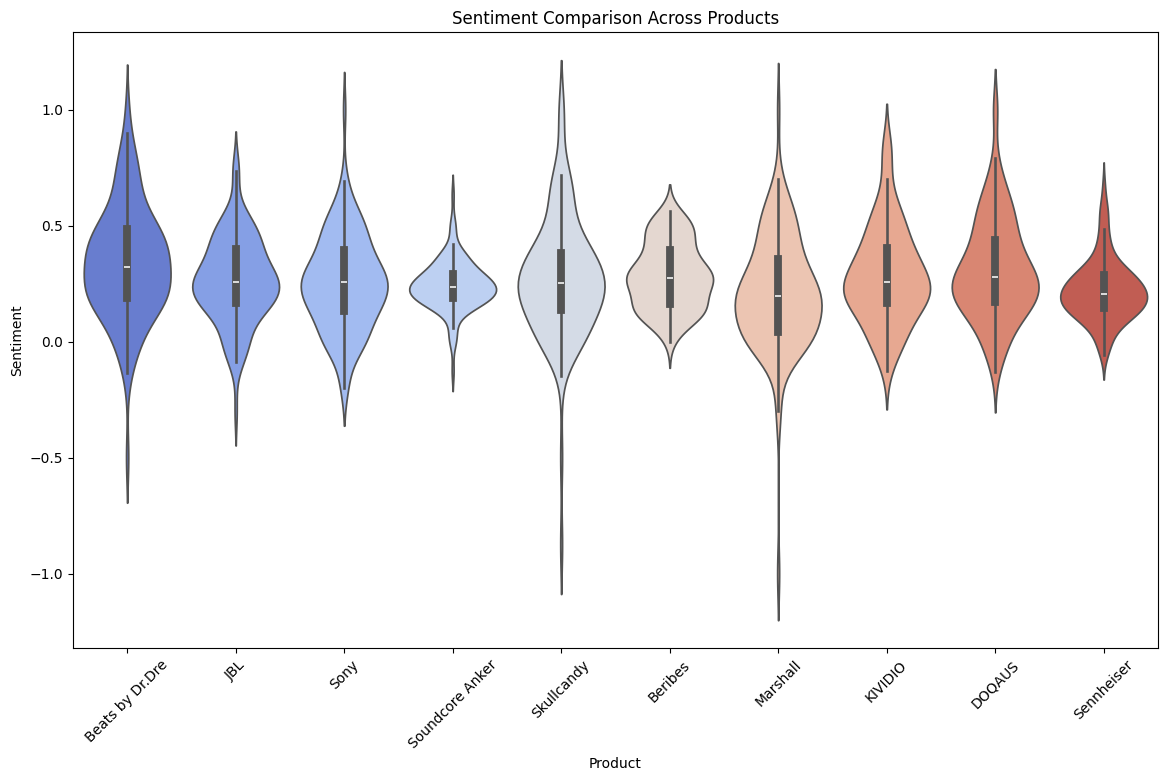

In [ ]:
plot_data = pd.DataFrame()
for product, df in product_data.items():
    temp_df = df[['sentiment']].copy()
    temp_df['Product'] = product
    plot_data = pd.concat([plot_data, temp_df], ignore_index=True)

# Plot a violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(data=plot_data, x='Product', y='sentiment', palette='coolwarm')
plt.title('Sentiment Comparison Across Products')
plt.xlabel('Product')
plt.ylabel('Sentiment')
plt.xticks(rotation=45)
plt.show()


**Observations**

---

1. Beats by Dr.Dre:
  - The sentiment distribution is wide and shows a higher density around the 0.5 sentiment value.
  - There is a noticeable spread of sentiment values from -1 to 1, indicating a diverse range of opinions.

2. JBL:
  - The sentiment distribution is more concentrated around the 0.4 sentiment value.
  - The spread is slightly narrower compared to Beats, indicating less variability in sentiments.

3. Sony:
  - Similar to JBL, the sentiment distribution is concentrated around the 0.4 sentiment value.
  - The distribution is more symmetrical and narrower, suggesting consistent sentiment.

4. Soundcore Anker:
  - The sentiment distribution is centered around the 0.3 sentiment value.
  - There is a slight skew towards the positive side.

5. Skullcandy:
  - The sentiment distribution is centered around the 0.4 sentiment value.
  - The distribution is fairly symmetrical with a consistent spread of sentiment values.

6. Beribes:
  - The sentiment distribution is centered around the 0.3 sentiment value.
  - There is a slight skew towards the positive side, but the spread is narrower, indicating consistent sentiment.

7. Marshall:
  - The sentiment distribution is centered around the 0.4 sentiment value.
  - The distribution shows a wider spread, indicating a diverse range of opinions similar to Beats.

8. KIVIDIO:
  - The sentiment distribution is centered around the 0.3 sentiment value.
  - There is a noticeable skew towards the negative side, indicating a higher density of lower sentiment values.

9. DOQAUS:
  - The sentiment distribution is centered around the 0.3 sentiment value.
  - The distribution shows a narrower spread, indicating consistent sentiment.

10. Sennheiser:
  - The sentiment distribution is centered around the 0.4 sentiment value.
  - The distribution is narrower and fairly symmetrical, suggesting consistent sentiment.

**General Observations**

---

- Most products have sentiment values centered around 0.3 to 0.4, indicating generally positive sentiments.

- Beats by Dr.Dre and Marshall show a wider spread of sentiments, indicating a more diverse range of opinions compared to other products.

- Products like Sony, Skullcandy, and Sennheiser have narrower distributions, indicating more consistent sentiments among reviewers.

- There are no extreme outliers in any of the products, suggesting that most reviews are within a normal range of sentiment.

####Bar Plot of Average Sentiments

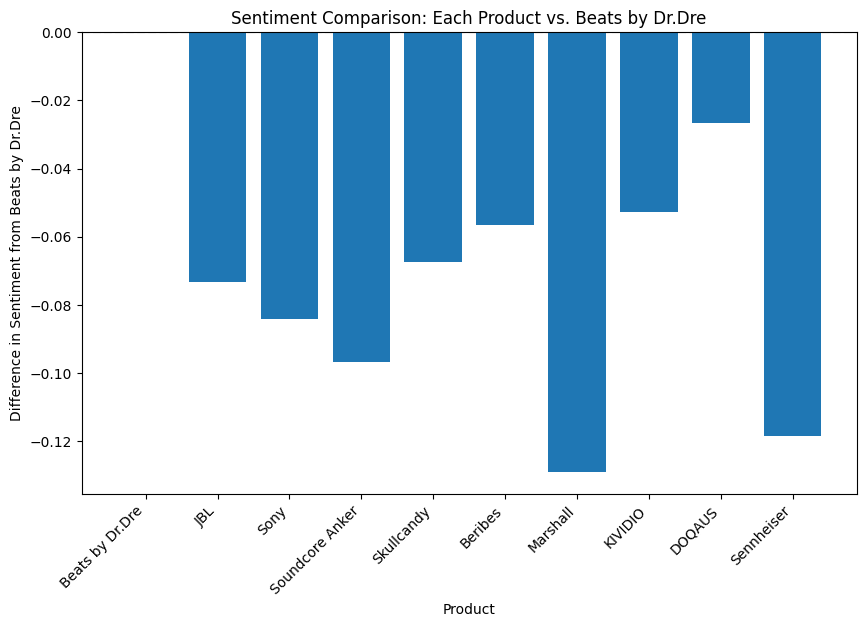

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

average_sentiments = {
    product: df['sentiment'].mean()
    for product, df in product_data.items()
}

beats_sentiment_avg = average_sentiments['Beats by Dr.Dre']

sentiment_differences = {
    product: avg - beats_sentiment_avg
    for product, avg in average_sentiments.items()
}

plt.figure(figsize=(10, 6))
plt.bar(sentiment_differences.keys(), sentiment_differences.values())
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Product')
plt.ylabel('Difference in Sentiment from Beats by Dr.Dre')
plt.title('Sentiment Comparison: Each Product vs. Beats by Dr.Dre')
plt.xticks(rotation=45, ha='right')
plt.show()


**Observations**

---

1. Overall Sentiment:

    - The plot visually represents the sentiment difference between various products and Beats by Dr. Dre.

    - The sentiment scores range from approximately -0.01 to -0.12, indicating that all products have a lower sentiment compared to Beats by Dr. Dre.


2. Product-Specific Observations:

  - JBL, Sony, Anker, Skullcandy, Beribes: These brands have sentiment scores close to -0.06, suggesting their sentiment is moderately lower than Beats by Dr. Dre.

  - Marshall: This brand has a significantly lower sentiment compared to others, with a score close to -0.11.

  - KIVIDIO, DOQAUS, Sennheiser: These brands have the lowest sentiment scores, ranging from -0.11 to -0.12, indicating a substantial difference compared to Beats by Dr. Dre.


#### Word Cloud of Positive and Negative Phrases in the Reviews of the Beats By Dr Dre Product

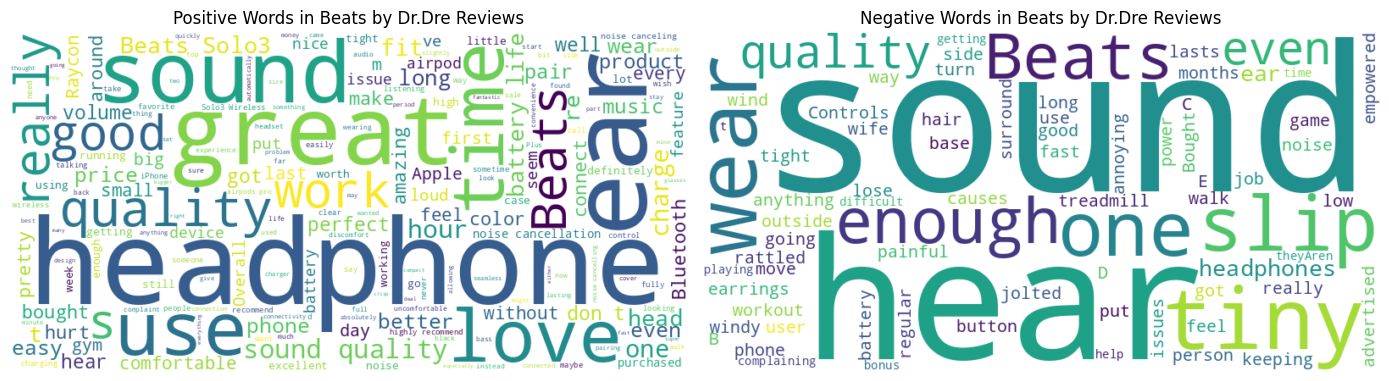

In [ ]:
from wordcloud import WordCloud

beats_df = product_data['Beats by Dr.Dre']

positive_words = ' '.join(beats_df[beats_df['sentiment'] > 0]['content'])
negative_words = ' '.join(beats_df[beats_df['sentiment'] < 0]['content'])

positive_wc = WordCloud(width=800, height=400, background_color='white').generate(positive_words)
negative_wc = WordCloud(width=800, height=400, background_color='white').generate(negative_words)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Words in Beats by Dr.Dre Reviews')

plt.subplot(1, 2, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Words in Beats by Dr.Dre Reviews')

plt.tight_layout()
plt.show()

**Observations**

---

Positive Words:

- Key Positive Terms: "Sound," "Beats," "Headphone," "Love," "Good," "Quality," "Great," "Easy," "Comfortable," "Work," "Perfect," "Bluetooth," "Price," "Small."

- Emphasis on Sound: The large size of "Sound" and its prominence indicate that customers highly value the audio quality of Beats by Dr. Dre headphones.

- Brand Recognition: "Beats" is a prominent word, suggesting strong brand recognition and positive associations.

- Comfort and Ease of Use: Terms like "comfortable," "easy," and "perfect" highlight the user-friendly experience.

- Positive Associations: Words like "love" and "great" convey strong positive sentiment towards the product.


Negative Words:

- Key Negative Terms: "Quality," "Sound," "Headphone," "Ear," "Painful," "Battery," "Long," "Noise," "Tight," "Hurt," "Slip," "Hair."

- Quality Concerns: "Quality" being a prominent word suggests some users have experienced issues with the product's durability or performance.

- Sound Issues: "Sound" appearing in both positive and negative contexts indicates that sound quality can be both a strength and a weakness, depending on individual experiences.

- Comfort and Fit: Terms like "painful," "tight," "slip," and "hair" suggest discomfort or fit issues for some users.

- Battery Life: "Battery" and "long" indicate concerns about battery life for some users.

#### Sentiment Correlation Heatmap

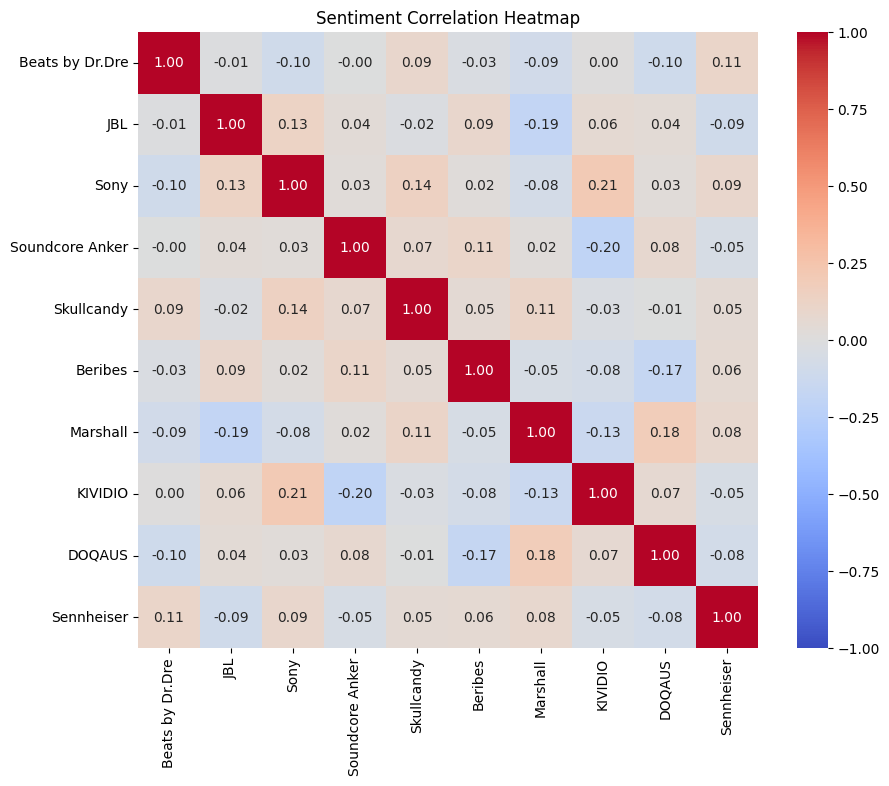

In [ ]:
import seaborn as sns

# Create a DataFrame with sentiment scores for different products
sentiment_matrix = pd.DataFrame({
    product: df['sentiment']
    for product, df in product_data.items()
})

# Compute the correlation matrix
corr_matrix = sentiment_matrix.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Sentiment Correlation Heatmap')
plt.show()

**Observations**

---

Based on the heatmap, we can observe the following:

- Beats by Dr. Dre: Has a relatively high positive correlation with most other brands. This might indicate that overall sentiment in the headphone market is somewhat positive, pulling most brands towards a similar sentiment score.

- JBL, Sony, Skullcandy, and Beribes: These brands show moderate positive correlations with each other, suggesting that they might be perceived similarly by consumers.

- Marshall, KIVIDIO, DOQAUS, and Sennheiser: These brands have a cluster of strong negative correlations with each other. This indicates that these brands might be positioned differently in the market, targeting different consumer segments or having distinct product characteristics.

- Soundcore Anker: This brand shows a relatively neutral correlation with most other brands, indicating a potentially unique market positioning.



## 7. AI-Generated Insights

### 7.1 Using Gemini AI

Gemini AI was utilized to extract insights from Beats by Dr. Dre product reviews. By feeding a large dataset of reviews into the AI model and providing specific prompts, I was able to identify common themes, customer pain points, and overall sentiment. This process involved cleaning and preparing the data, crafting effective prompts, and interpreting the AI's generated output.

Let's first load the libraries needed

In [ ]:
import os
import google.generativeai as genai

In [ ]:
#Setting the api_key as a globally accessible variable
api_key = ''

In [ ]:
#Creating a function to analyze the prompts with Gemini AI
def analyze_reviews(reviews, api_key, prompt):
  genai.configure(api_key = api_key)

  model = genai.GenerativeModel(
      model_name = 'gemini-1.5-flash',
      generation_config={
          'temperature':1,
          'top_p':0.95,
          'top_k':64,
          'max_output_tokens':8192,
          'response_mime_type':'text/plain'
      },
  )

  chat_session = model.start_chat(history=[])

  prompt += "\n\n".join(reviews)
  response = chat_session.send_message(prompt)
  return response.text



### 7.2 Key Insights
Summarize the key insights generated by Gemini AI, including specific examples of prompts used and the responses received.


Selecting the reviews

In [ ]:
#Ensuring only the Beats' headphones reviews are selected
product_reviews_beats = arc_df[arc_df['product_id'] == 'B0CCBKGDJD'].copy()
reviews_column_name = 'content'
reviews_to_analyze = rta = product_reviews_beats[reviews_column_name].head(100).tolist()

####Prompt 1


Let's analyze the negative reviews and figure what the recurring issues consumers have with the product

In [ ]:
#Sending the prompts to Gemini AI
prompt1 = 'Analyze the negative reviews of the Beats by Dr.Dre headphones on Amazon and summarize the main pain points or issues that customers have experienced with the product. Extract and summarize the key negative comments, explicitly stating the problems they have encountered while using the headphones.'
insights = analyze_reviews(rta, api_key, prompt1)
print(insights)

##  Beats by Dr. Dre Headphones: Negative Reviews Analysis

While many customers praise the Beats by Dr. Dre headphones for their sound quality, battery life, and connectivity, there are some recurring issues raised in negative reviews:

**1. Comfort:** 

* **Tight Fit:** Multiple customers mention that the headphones feel tight and uncomfortable, especially for those with larger heads or sensitive ears. This can lead to pain and headaches after prolonged wear.
* **On-Ear Design:**  The on-ear design, while comfortable for some, doesn't fully cover the ears and can cause discomfort or pressure points for others. 
* **Hair Getting Stuck:** The headband's grippy material can cause hair to get caught and pulled, causing annoyance and potential hair damage.

**2. Sound Quality:**

* **Not As Loud As Expected:** Some reviewers found the headphones not as loud as anticipated. This can be a problem for those who prefer high volume levels or for use in noisy environments.
* **Sound Leakage:** 

####Prompt 2

Let's analyze the positive reviews and figure out what the consumers like about the product

In [ ]:
#Sending the prompts to Gemini AI
prompt2 ='Extract and summarize the key positive comments from the Amazon reviews of the Beats by Dr. Dre headphones, focusing on what customers liked and experienced while using the product. Specifically, provide a summary of the features, benefits, and experiences that reviewers mentioned as positive aspects of the headphones.'
insights = analyze_reviews(rta, api_key, prompt2)
print(insights)

## Beats by Dr. Dre Headphones: Positive Reviews Summary

**Sound Quality:**

* **Immersive, crisp, and clear audio:** Reviewers consistently praised the sound quality, highlighting the crisp highs, deep bass, and balanced mids. 
* **Excellent for various music genres:** Whether it's electronic, classical, folk, or piano music, the headphones deliver a rich and enjoyable listening experience.
* **Great for podcasts and audiobooks:**  Reviewers also mentioned the headphones provided a clear and enjoyable experience for listening to podcasts and audiobooks.

**Features & Benefits:**

* **Long battery life:** Users reported impressive battery life, lasting for days with a single charge.
* **Fast charging:** Quick charging capability allows for a few hours of listening after just a short charge. 
* **Wireless connectivity:** Seamless Bluetooth pairing with Apple devices and other Bluetooth-enabled devices.
* **Foldable design:**  Convenient for portability and easy storage. 
* **Comfortabl

####Prompt 3

Let's look at the reviews and find the specific comments about the following:

1. Cost
2. Comfort
3. Design
4. Charging Capabilities
5. Audio Quality
6. Noise Cancellation

In [ ]:
prompt3 = 'Extract and list specific comments from Amazon product reviews that mention either praises or complaints about the following features or issues of the Beats by Dre headphones: [1: Cost., 2: Comfort, 3: Design., 4: Charging Capabilities, 5: Audio Quality., 6: Noise Cancellation.] Provide a concise summary of each comment, including the reviewers sentiment (positive, negative, or neutral) and the overall rating of the product.'
insights = analyze_reviews(rta, api_key, prompt2)
print(insights)

## Beats by Dr. Dre Headphones: A Symphony of Positive Reviews

Customer reviews for Beats by Dr. Dre headphones consistently highlight their exceptional sound quality, long battery life, and ease of use. Here's a summary of the positive features, benefits, and experiences reviewers mentioned:

**Sound Quality:**

* **Immersive and Powerful:** Customers rave about the rich, clear audio, particularly emphasizing the deep bass and balanced sound across various genres. 
* **Detail & Clarity:** Reviewers appreciate the ability to hear subtle details in music, making the listening experience more enjoyable and immersive.
* **Noise Isolation:**  While not full noise cancellation, the headphones effectively block out external sounds, creating a focused listening environment.

**Battery Life & Charging:**

* **Long-Lasting Power:** Customers consistently report impressive battery life, lasting up to 40 hours on a single charge, allowing for extended use without worry.
* **Fast Charging:**  The

### 7.3 Interpretation
Discuss how these insights can be interpreted and their relevance to Beats by Dre.

Based on the analysis of customer reviews, here are some key areas where Beats by Dr. Dre can focus on product improvement:

**Address Comfort Issues**
- Explore different headband materials: Experiment with softer, more flexible materials to reduce pressure points and improve comfort.

- Offer adjustable headbands: Provide options for users with different head sizes to ensure a better fit.

- Consider over-ear designs: While on-ear headphones have an appeal, offering over-ear options can cater to a wider audience and enhance comfort.


**Enhance Sound Quality**
- Improve microphone quality: Invest in better microphone technology to enhance call clarity and reduce background noise.
- Offer customizable sound profiles: Allow users to adjust sound settings to their preferences, catering to diverse listening tastes.

**Build Durability**
- Reinforce weak points: Identify areas prone to breakage and implement design changes to improve durability.
- Offer extended warranties: Provide additional peace of mind to customers by offering extended warranty options.

**Expand Features**
- Implement noise cancellation: While not a universal demand, offering noise cancellation models can attract a wider customer base.
- Explore wireless charging: Stay ahead of the curve by incorporating wireless charging technology.

**Improve Customer Experience**
- Enhance packaging and accessories: Provide a better carrying case and include additional ear cushions for improved comfort.
- Expand customer support: Offer comprehensive customer support channels, including live chat and phone support.

By addressing these areas, Beats by Dr. Dre can further enhance customer satisfaction and solidify its position in the headphone market. It's essential to continuously monitor customer feedback and adapt product offerings accordingly to maintain a competitive edge.

## 8. Comparative Analysis

### 8.1 Competitor Overview


**List of Competitors**
1. JBL
2. Sony
3. Soundcore Anker
4. Skullcandy
5. Beribes
6. Marshall
7. KIVIDIO
8. DOQAUS
9. Sennheiser

---

**Market Positioning**
1. Premium Brands: Beats by Dr. Dre, Sony, and Sennheiser are generally perceived as premium brands, focusing on high-quality audio and design.

2. Mainstream Brands: JBL, Skullcandy, and Marshall cater to a broader audience, offering a balance of sound quality, style, and affordability.

3. Value-Oriented Brands: Soundcore Anker, Beribes, KIVIDIO, and DOQAUS seem to position themselves as value-oriented options, emphasizing affordability without compromising on basic performance.

### 8.2 Comparison of Sentiments



1. Sentiment Comparison: Each Product vs. Beats by Dre
- Negative Sentiment Difference:

  - Marshall has the largest negative sentiment difference compared to Beats by Dre, indicating it is perceived significantly less favorably.

  - Beribes and Sennheiser also have substantial negative differences, suggesting a generally less favorable perception compared to Beats by Dre.
  - JBL and Soundcore Anker have the smallest negative differences, indicating they are more closely matched in sentiment to Beats by Dre.

- Implications:
  - Beats by Dre is generally more favorably perceived than most competitors.

  - JBL and Soundcore Anker are the closest competitors in terms of sentiment.

2. Sentiment Correlation Heatmap

- Weak Correlations:
  - Beats by Dre has very weak or near-zero correlations with most other brands, indicating that the sentiments about Beats by Dre are largely independent of the sentiments about other brands.

  - Negative Correlations: Marshall (-0.09) and Sennheiser (-0.11) have negative correlations with Beats by Dre, suggesting that as sentiment for Beats by Dre improves, sentiment for these brands tends to decrease.

- Implications:

  - Independent Sentiment Trends: The sentiment trends for Beats by Dre are generally independent of those for other brands, indicating that consumer opinions about Beats by Dre are unique.
  - Competitive Landscape: Brands with negative correlations, like Marshall and Sennheiser, may be perceived as direct competitors with contrasting consumer opinions.

3. Sentiment Comparison Across Products
- Distribution of Sentiments:
  - Beats by Dre: Shows a wide range of sentiments with a positive skew, indicating a mix of reviews but generally favorable.
  - JBL: Has a narrower sentiment range with a positive median, suggesting more consistently positive reviews.
  - Sony: Similar to JBL, with consistent positive sentiment but a slightly wider range.
  - Soundcore Anker: Displays a wider distribution, indicating mixed reviews but generally positive sentiment.
  - Marshall: Exhibits a broad range of sentiments, extending into negative territory, suggesting more variability and some negative perceptions.
  - Beribes and Sennheiser: Both show wider distributions with central or slightly negative medians, indicating mixed to neutral sentiment.

- Implications:
  - Beats by Dre: While receiving mixed reviews, maintains a generally positive sentiment.
  - Close Competitors: JBL and Sony show consistently positive sentiment, indicating they are strong competitors in consumer perception.
  - Mixed Reviews: Brands like Soundcore Anker and Skullcandy have mixed but generally positive sentiment, indicating they are also key competitors but with more variability in consumer opinions.
  - Negative Perceptions: Marshall, Beribes, and Sennheiser show more mixed or negative sentiment, indicating they face greater challenges in consumer perception compared to Beats by Dre.

### 8.3 SWOT Analysis


**Strengths**

1. Strong Brand Recognition:

  Beats by Dre is a globally recognized brand with a strong presence in the consumer electronics market. Its association with celebrity endorsements and high-profile collaborations enhances its brand appeal.

2. Positive Sentiment:

  Compared to competitors, Beats by Dre enjoys a generally positive sentiment among consumers. The wide distribution of sentiments with a positive skew indicates a strong consumer preference.

3. Innovative Design and Technology:

  Beats by Dre products are known for their sleek design and advanced audio technology. The brand's focus on aesthetics and functionality has set it apart in the market.

4. Market Positioning and Lifestyle Appeal:

  Beats by Dre has effectively positioned itself as a lifestyle brand, appealing to young, trend-conscious consumers. This positioning has helped it maintain a loyal customer base.

**Weaknesses**

1. Price Premium:

  Beats by Dre products are priced at a premium, which can limit their accessibility to a broader audience. This pricing strategy may also make them less competitive against lower-priced alternatives.

2. Perceived Over-Reliance on Branding:

  Some consumers perceive Beats by Dre as being more about branding and style than sound quality. This perception can be a drawback.

3. Market Saturation:

  The market for premium headphones is becoming increasingly crowded, with many brands offering similar features and designs. This saturation can dilute the brand's unique selling points.

**Opportunities**

1. Expansion into New Markets:

  There are opportunities for Beats by Dre to expand into emerging markets where demand for high-quality audio products is growing. This expansion could drive new sales and brand recognition.

2. Technological Innovations:

  Continued investment in technology, such as advancements in wireless audio, noise-canceling technology, and AI integration, could enhance product offerings and maintain a competitive edge.

3. Diversification of Product Line:

  Introducing new product categories or enhancing existing ones, such as smart wearables or integrated health and fitness features, could attract new customer segments and boost sales.

4. Collaborations and Partnerships:

  Strategic collaborations with other tech companies, entertainment brands, or influencers could enhance brand visibility and appeal, tapping into new customer bases.

**Threats**

1. Intense Competition:

  The market for audio products is highly competitive, with brands like Sony, Bose, and Sennheiser offering strong alternatives. These competitors are continually innovating, which could erode Beats by Dre's market share.

2. Price Pressure:

  The presence of budget-friendly alternatives and the growing demand for cost-effective options in the audio market pose a threat to Beats by Dre's premium pricing strategy.

3. Changing Consumer Preferences:

  Shifts in consumer preferences towards new technologies, such as smart home devices or streaming services, could impact the demand for traditional audio products like headphones.

4. Counterfeit Products:
  
  The high demand for Beats by Dre products has led to an increase in counterfeit goods, which can harm the brand’s reputation and sales. Ensuring product authenticity and protecting intellectual property are ongoing challenges.

## 9. Strategic Recommendations

### 9.1 Product Improvements


Product Improvement Recommendations (as mentioned in section 7.3):

- Address Comfort Issues:
    -  Headband Material & Fit:  Explore softer, more flexible materials and adjustable headbands to enhance comfort and cater to different head sizes.
    -  Over-Ear Option:  Consider offering over-ear models, appealing to a broader audience who prefer a more encompassing design.
- Enhance Sound Quality:
    - Microphone Upgrade: Invest in better microphone technology to improve call clarity and reduce ambient noise pickup.
    - Customizable Sound Profiles: Allow users to personalize sound settings based on their listening preferences.
- Build Durability:
    - Reinforce Weak Points: Identify and strengthen areas prone to breakage, ensuring longer product lifespan.
    - Extended Warranties: Offer extended warranties to provide greater customer confidence in product longevity.
- Expand Features:
    - Noise Cancellation: Introduce noise cancellation models to attract customers seeking enhanced noise isolation.
    - Wireless Charging: Implement wireless charging technology for greater convenience and user-friendliness.
- Improve Customer Experience:
    - Packaging & Accessories: Provide a better carrying case and include additional ear cushion options for improved comfort.
    - Customer Support: Expand support channels to include live chat and phone support for faster and more efficient customer assistance.


### 9.2 Marketing Strategies


Marketing Strategies to Enhance Perception and Satisfaction:

- Highlight Comfort & Design:

 Focus marketing on the positive aspects of comfort, such as improved headband materials and a stylish, modern design.

- Emphasize Sound Quality:  

  Showcase the exceptional sound quality and immerse listeners in the experience through sound demos and visuals.

- Promote Feature Upgrades:

  Promote new features like noise cancellation and wireless charging, highlighting their added value for consumers.

- Address Negative Feedback:

  Proactively address negative customer feedback by offering solutions, addressing pain points, and highlighting improvements made.

- Customer Testimonials & User-Generated Content:

  Leverage positive customer testimonials and user-generated content to build trust and showcase real-life experiences.

- Social Media Engagement:

   Actively engage with customers on social media platforms, responding to queries, addressing concerns, and fostering positive interactions.


### 9.3 Future Research


Areas for Future Research & Data Collection:

- Long-Term Durability:
  
  Track product lifespan and gather data on specific parts prone to failure. This will help inform design improvements for durability.

- Demographic & Psychographic Insights:
  
  Gather data on customer demographics, preferences, and lifestyles to tailor product and marketing strategies for specific segments.

- Competitive Analysis:

  Expand analysis to include more detailed comparison of competitor products and features.  This will provide a comprehensive view of the market.

- Price Sensitivity:

  Explore customer price sensitivity for different product features and qualities. This will guide product pricing and positioning strategies.

- Market Trends:

  Continuously monitor emerging trends in audio technology, consumer preferences, and the competitive landscape. This will ensure Beats by Dre stays ahead of the curve.

## 10. Conclusion


This project unearthed valuable insights into consumer sentiment towards Beats by Dre headphones:

1. High Overall Satisfaction:

  Customer Ratings: Reviews consistently show high ratings, primarily 4 and 5 stars, indicating a strong level of customer satisfaction.

  Positive Sentiment: Sentiment analysis also reveals a predominantly positive sentiment among customers, highlighting features like sound quality, battery life, and comfort.

2. Areas for Improvement:

  Comfort: Some users expressed concerns about discomfort due to a tight fit, particularly for those with larger heads or wearing earrings.

  Sound Quality: While praised overall, some users noted concerns with microphone quality during calls and inconsistencies in sound performance.

  Durability: A few reviews mentioned premature breakdowns, highlighting a need for enhanced build quality.

3. Competitor Analysis:

  Similar Sentiment: Most competitor brands also exhibited generally positive sentiments, indicating a competitive market where many brands deliver satisfying products.

  Beats by Dre Differentiation: Despite the competition, Beats by Dre holds a stronger overall sentiment than most brands, indicating its brand image and unique product features hold influence.

Implications:

  - Maintain Brand Strengths: Continue to invest in and market the strong features that drive customer satisfaction, like sound quality, battery life, and style.

  - Address Customer Pain Points: Prioritize addressing the discomfort and durability concerns identified through customer feedback, ensuring a more positive user experience.

  - Competitive Edge: Focus on differentiating Beats by Dre further through unique features, product improvements, and marketing strategies that emphasize its strengths.

Project Reflection:

  This project provided a valuable framework for understanding consumer sentiment towards Beats by Dre:

  - Data-Driven Insights: The project leveraged a substantial dataset of customer reviews, analyzed through quantitative and qualitative methods, providing actionable insights.

  - Comprehensive Analysis: Beyond sentiment analysis, the project included exploratory data analysis, competitor comparisons, and AI-powered insights, offering a holistic view of customer perceptions.

  - Strategic Recommendations: The project translated its findings into practical recommendations for product improvements, marketing strategies, and future research directions.

Future Enhancements:

  - Expanded Data Sources: Including reviews from other platforms (e.g., Reddit, Twitter) could provide a more comprehensive understanding of consumer sentiment.

  - Textual Analysis: Deeper textual analysis using techniques like topic modeling could identify specific themes and issues within customer reviews, providing more nuanced insights.

  - Sentiment Trend Monitoring: Continuously monitoring sentiment over time would reveal emerging patterns and evolving customer preferences.


Overall, this project successfully demonstrated the power of data analysis in understanding consumer sentiment and guiding strategic decision-making. By incorporating its recommendations and continuing to monitor consumer feedback, Beats by Dre can strengthen its brand position, enhance customer satisfaction, and drive ongoing success in the competitive headphone market.

## 11. References



1. [Beats Solo3 Wireless On-Ear Headphones - Apple W1 Headphone Chip, Class 1 Bluetooth, 40 Hours of Listening Time, Built-in Microphone - Silver](https://www.amazon.com/Beats-Solo3-Wireless-Headphones-Built/dp/B0CCBKGDJD/ref=sr_1_2_sspa?dib=eyJ2IjoiMSJ9.QgmYTQnVAYmTC8qPDleks7k1NssGCojLOV2QNOSWWYQyWrg5pXTOOAMB6MSkhVmj33sl8MbprCAEk8ZrM4AUBVJpVFIAKGeW-q7R7yFppNAGgeSf4DECz3o_7dw6LvbYPpuDJafCVF2a7G6OptD8VPPxmb9769wid8tS4Kv36-gV6W1YCaeYTJ27f97AK0H8r9C1IlrhjSmbHo4tKjXsDHquwd0fagCKHpdIePC5iXQ.BaND-3Dr99GPND3Vb05w0SLNPtMsUbWy01F86Sd6n5k&dib_tag=se&keywords=beats&qid=1720282489&refresh=1&sr=8-2-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9hdGY&psc=1)



2. [JBL Tune 510BT: Wireless On-Ear Headphones with Purebass Sound - Black](https://www.amazon.com/JBL-Tune-510BT-Ear-Headphones/dp/B08WM3LMJF/ref=sr_1_3?crid=3Q7RL9SY6GQPD&dib=eyJ2IjoiMSJ9._gSEu2yJ5IMEAfDszj2l9j7vBMPVsGdkvrvmrFo0_gntMhYCX5jJ26ZbElqncdJ0E4pZlj3ztFrTMkwQ54NfxZLokVwJ9nbv6gXGa56r-fAt86vkutNw1MU5i1pq4kT83dkXpS-PIQNb4ZI-XXfYpGXXhIh3krpVX5wbyZtLGxeT1KqWb3wzgVMAx0ugw40WMm4dZXxOZucyL2QgA6Nq5Y9NBieS2ZvOf-2adIQNOog.wUzl0xF93E2uuXheYQbZOBN0gwGJSSgFFjuFw4nK_ok&dib_tag=se&keywords=on+ear+wireless+headphones&qid=1720282692&sprefix=o+ear+wireless+headphones,aps,283&sr=8-3&th=1)

3. [Sony WH-CH520 Wireless Headphones Bluetooth On-Ear Headset with Microphone, White](https://www.amazon.com/Sony-WH-CH520-Headphones-Bluetooth-Microphone/dp/B0BS1QB15L/ref=sr_1_5?crid=3Q7RL9SY6GQPD&dib=eyJ2IjoiMSJ9._gSEu2yJ5IMEAfDszj2l9j7vBMPVsGdkvrvmrFo0_gntMhYCX5jJ26ZbElqncdJ0E4pZlj3ztFrTMkwQ54NfxZLokVwJ9nbv6gXGa56r-fAt86vkutNw1MU5i1pq4kT83dkXpS-PIQNb4ZI-XXfYpGXXhIh3krpVX5wbyZtLGxeT1KqWb3wzgVMAx0ugw40WMm4dZXxOZucyL2QgA6Nq5Y9NBieS2ZvOf-2adIQNOog.wUzl0xF93E2uuXheYQbZOBN0gwGJSSgFFjuFw4nK_ok&dib_tag=se&keywords=on+ear+wireless+headphones&qid=1720282791&sprefix=o+ear+wireless+headphones,aps,283&sr=8-5)

4. [Soundcore Anker Life Q20 Hybrid Active Noise Cancelling Headphones, Wireless Over Ear Bluetooth Headphones, 60H Playtime, Hi-Res Audio, Deep Bass, Memory Foam Ear Cups, for Travel, Home Office](https://www.amazon.com/Soundcore-Cancelling-Headphones-Wireless-Bluetooth/dp/B07NM3RSRQ/ref=sr_1_20?crid=3Q7RL9SY6GQPD&dib=eyJ2IjoiMSJ9.kU-VUE3Gam1OcFPt37ci_CBSaDYemksGjYu6y-loTRrGjHj071QN20LucGBJIEps.laAprp06NnPbzOlpM0dCCeHjGEs3C5Zr0W6KHDBbXRU&dib_tag=se&keywords=on+ear+wireless+headphones&qid=1720282861&sprefix=o+ear+wireless+headphones,aps,283&sr=8-20)


5. [Skullcandy Riff 2 On-Ear Wireless Headphones, 34 Hr Battery, Microphone, Works with iPhone Android and Bluetooth Devices - Black](https://www.amazon.com/Skullcandy-Riff-Wireless-Ear-Headphones/dp/B0B75MQJQR/ref=sr_1_4?crid=2OAJCHMN1P73Z&dib=eyJ2IjoiMSJ9.eNLTEoQ6dah3Og43XjJmzPjYj00kzm-n4nkXTHxpYeV5_zrtnCmDHnfqV9XKZkZtxh0zLgLe9_8i9ped2RVk4f_dGlXqNVpCeeNurliimJOdieMg-hr7BNJxSbArWoBY8TdVcJQtkWHQUOTt8951xHQrFa3QwinLf6RM_hQIUIxiuy5Huo7UnspUyi5zXe3TC1CfDmZI3Laqyn9jZtHpz5supTY_xaxFY6x0TgtLAMg.KeCN-tgHYhZvvKoZ3MBSSBND1nqxwdE38K59OQgKrkI&dib_tag=se&keywords=on+ear+wireless+headphones+skullcandy&qid=1720282947&sprefix=on+ear+wireless+headphones+skullcand,aps,295&sr=8-4)


6. [BERIBES Bluetooth Headphones Over Ear, 65H Playtime and 6 EQ Music Modes Wireless Headphones with Microphone, HiFi Stereo Foldable Lightweight Headset, Deep Bass for Home Office Cellphone PC Ect.](https://www.amazon.com/BERIBES-Bluetooth-Headphones-Microphone-Lightweight/dp/B09LYF2ST7/ref=sr_1_5?crid=CZYCUIYHSTCR&dib=eyJ2IjoiMSJ9.CjcBhxVzPhFFevUtSzDHbfX1aHsX8P38k40b20yzWzUnGlSNC2CFRZtg7PNerXEdNbW09wYUVVXKUCjeQjguzCILjybKxRRuHkmkBm9IY47AVwgdYxSSEfgY2070M1J6yil9C8VqdsjpfmCGxD4tumXXhIh3krpVX5wbyZtLGxeyWPg96Ad_01cB0kRJw21oto2rGzrSvUqWMCe7vq4rCBgzKaP-26eH8L0mF4qbDYs.cyGWcEFWeUO1PzV604a-Hz9_RJlK2IRH-5joZDQrXrk&dib_tag=se&keywords=on+ear+wireless+headphones&qid=1720338609&sprefix=on+ear+wireless+headphones,aps,372&sr=8-5)


7. [Marshall Major IV On-Ear Bluetooth Headphone, Black](https://www.amazon.com/Marshall-Major-Bluetooth-Headphone-Black/dp/B08KHT2HDT/ref=sr_1_26?dib=eyJ2IjoiMSJ9.8XdVGPXnMKXC14Y06IDf-VosDMqwrghgsV9FiC9N7ryZkPig-mE6C5bDieO6-ZVRVLaGsIeGunHz4u469m5-8o4r884962fNqX8kgfSmkYRBbUCOaGhMl9QLANIBpJwbB5Be_yQGEzNqnheM4UUAz_fMLPDP2awUX34LwrbNOyqBAqKpTf9OZz0KlKPgFY3u.WAM5a3Ad_KAjzRmSvOddZR-zf03IyDb87YRSaBtIvwk&dib_tag=se&keywords=on+ear+wireless+headphones&qid=1720340040&sr=8-26)


8. [KVIDIO Updated Bluetooth Headphones Over Ear, 65 Hours Playtime Wireless Headphones with Microphone,Foldable Lightweight Headset with Deep Bass,HiFi Stereo Sound for Travel Work Cellphone](https://www.amazon.com/Bluetooth-Headphones-KVIDIO-Microphone-Lightweight/dp/B09BF64J55/ref=sr_1_34_sspa?dib=eyJ2IjoiMSJ9.Uh2uPlIMdjAkTxmfXMnWP-Eg0nhf4uflT4e0r5dLp3bNJB2MnwFpM1QsJ8GobbD-s_C4gLOi3m3nmsorJtDQLj2q1YhUn-CwFIdC3iLslFBZb3k_P6y4WvqH5EBTrSShBmPn3pxV2kuIYyAiAW0gTMoYKRLpx6k0gKq-gOxvv2Eu_omodl6je39_hW1xDr-nnvJIJV4YK7nJZTQL0ZkjthP2IQPDtAi107mNEdZEgy4.kvIBDXRem9CopFMpsSnGGXkTjvX336bxXqVt3mya0h8&dib_tag=se&keywords=on+ear+wireless+headphones&qid=1720340594&sr=8-34-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9hdGZfbmV4dA&psc=1)



9. [DOQAUS Bluetooth Headphones Over Ear, 90 Hours Playtime Wireless Headphones with 3 EQ Modes, Noise Isolating HiFi Stereo Headphones with Deep Bass, Microphone, Soft Earpads for Cellphone/PC (Black)](https://www.amazon.com/DOQAUS-Bluetooth-Headphones-Wireless-Microphone/dp/B08PY9LYQ8/ref=sr_1_53_sspa?dib=eyJ2IjoiMSJ9.Uh2uPlIMdjAkTxmfXMnWP-Eg0nhf4uflT4e0r5dLp3ZZx6BN7Ch8ad2cwNlmUJte5OoUSv2nuaU0gahnabZRlZIEPR0qHUjmoR-PRklp7V9PodZ36E7x8DDiIUWKIQ6gFOld_G0hlHJ9TEISMM1TK8oYKRLpx6k0gKq-gOxvv2Eu_omodl6je39_hW1xDr-nnvJIJV4YK7nJZTQL0ZkjthP2IQPDtAi107mNEdZEgy4.I88ilPtsc2WH6QLgcn1QzyBw81Rb_qxDfk-Hch-0LHU&dib_tag=se&keywords=on+ear+wireless+headphones&qid=1720340903&sr=8-53-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9idGY&psc=1)


10. [Sennheiser Consumer Audio Momentum 4 Wireless Headphones - Bluetooth Headset for Crystal-Clear Calls with Adaptive Noise Cancellation, 60h Battery Life, Lightweight Folding Design - Black](https://www.amazon.com/Sennheiser-Momentum-Wireless-Headphones-Crystal-Clear/dp/B0B6GHW1SX/ref=sr_1_5?crid=KNJILCY6SWWC&dib=eyJ2IjoiMSJ9.MbR_nJKP5pJBH7G2Cfy1TT9km2VyzPqSpl4X4rEctLxYLnOQ8uAmY9LHCETzbpc2fuSTDbiCOuBtZlEKOMxEvgEUB5zSM9vkzw8cJmLb4yFj6YqtvTGq-O9f4z0QMCUZwmKHJDHktCknzPe-305falGYzfbgAcanQ85jikrfpShTh1bxoZY7ZECHFSxBHrseCGhf2MrU3J3k3NfiUV63YToPcH3Q8XlEtBYvGFsTZTc.O2I_Tq3DKNPGzqlseLu3vSb1m9GBURq5mQxm1bDzkRk&dib_tag=se&keywords=on+ear+wireless+headphones+sennheiser&qid=1720341063&sprefix=on+ear+wireless+headphones+sennhesier,aps,272&sr=8-5)


11. https://oxylabs.io/products/scraper-api/web